In [14]:
# Week 5–6: Model Development & Evaluation
# Project: Cricket Player Performance Prediction


In [15]:
df = pd.read_csv("dataset.csv")


In [16]:
import pandas as pd

# Load dataset from the same folder
df = pd.read_csv("dataset.csv")

# Check first 5 rows
df.head()


,match_number,batter,team_A,team_B,venue,runs_batter,balls_faced,bowler,wickets,runs_conceded,runs_at_venue,wickets_at_venue,runs_vs_opponent,wickets_vs_opponent,career_runs,career_wickets,career_runs_conceded,next_match_runs,next_match_wickets
0,0.0,AR Patel,1,2,Eden Gardens,2.0,2.0,AR Patel,24.0,14.0,9.500000,24.166667,7.0000,20.777778,0.0,0.0,0.0,0.0,25.0
1,0.0,DR Smith,8,3,Eden Gardens,57.0,48.0,DR Smith,12.0,17.0,27.750000,15.750000,36.9375,11.166667,163.0,6.0,6.0,62.0,12.0
2,0.0,DR Smith,14,4,Delhi,1.0,3.0,DR Smith,12.0,29.0,33.571429,11.333333,27.0000,10.333333,282.0,18.0,23.0,73.0,6.0
3,0.0,DR Smith,14,5,Banglore,73.0,41.0,DR Smith,6.0,14.0,32.833333,11.000000,23.0000,8.666667,283.0,30.0,52.0,34.0,12.0
4,0.0,DS Kulkarni,3,8,Banglore,10.0,5.0,DS Kulkarni,26.0,46.0,7.333333,20.500000,4.4000,20.304348,0.0,0.0,0.0,3.0,24.0


In [17]:
# List all columns
df.columns


Index(['match_number', 'batter', 'team_A', 'team_B', 'venue', 'runs_batter',
       'balls_faced', 'bowler', 'wickets', 'runs_conceded', 'runs_at_venue',
       'wickets_at_venue', 'runs_vs_opponent', 'wickets_vs_opponent',
       'career_runs', 'career_wickets', 'career_runs_conceded',
       'next_match_runs', 'next_match_wickets'],
      dtype='object')

In [18]:
# Train-test split: first 80% for training, last 20% for testing
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

# Separate features and target
target = 'next_match_runs'
drop_cols = ['next_match_runs', 'batter', 'bowler', 'match_number', 'team_A', 'team_B', 'venue']
features = [col for col in df.columns if col not in drop_cols]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

# Check shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


X_train: (4526, 12)
X_test: (1132, 12)
y_train: (4526,)
y_test: (1132,)


In [19]:
# Fill NaN in baseline_pred with player's average in train set
player_mean = train.groupby('batter')['next_match_runs'].mean()
test['baseline_pred'] = test['batter'].map(player_mean)

# For any remaining NaN (players not in train), fill with overall mean
overall_mean = train['next_match_runs'].mean()
test['baseline_pred'].fillna(overall_mean, inplace=True)

# Now evaluate
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, test['baseline_pred']))
mae = mean_absolute_error(y_test, test['baseline_pred'])
r2 = r2_score(y_test, test['baseline_pred'])

print(f"Baseline RMSE: {rmse:.2f}")
print(f"Baseline MAE: {mae:.2f}")
print(f"Baseline R2: {r2:.2f}")


Baseline RMSE: 16.37
Baseline MAE: 11.26
Baseline R2: 0.15


C:\Users\K M KALAIPRIYA\AppData\Local\Temp\ipykernel_19544\1916936704.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['baseline_pred'] = test['batter'].map(player_mean)
C:\Users\K M KALAIPRIYA\AppData\Local\Temp\ipykernel_19544\1916936704.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original 

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create the model
rf = RandomForestRegressor(
    n_estimators=200,   # number of trees
    max_depth=10,       # depth of each tree
    random_state=42
)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on test set
y_pred = rf.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest RMSE: {rmse:.2f}")
print(f"Random Forest MAE: {mae:.2f}")
print(f"Random Forest R2: {r2:.2f}")


Random Forest RMSE: 16.92
Random Forest MAE: 12.21
Random Forest R2: 0.09


In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create XGBoost model
xgb = XGBRegressor(
    n_estimators=300,      # number of trees
    learning_rate=0.05,    # step size
    max_depth=6,           # depth of each tree
    subsample=0.8,         # row sampling
    colsample_bytree=0.8,  # feature sampling
    random_state=42
)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on test set
y_pred = xgb.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost RMSE: {rmse:.2f}")
print(f"XGBoost MAE: {mae:.2f}")
print(f"XGBoost R2: {r2:.2f}")


XGBoost RMSE: 17.41
XGBoost MAE: 12.20
XGBoost R2: 0.04


In [22]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [23]:
!pip install shap


Defaulting to user installation because normal site-packages is not writeable


In [24]:
!pip install matplotlib



Defaulting to user installation because normal site-packages is not writeable


C:\Users\K M KALAIPRIYA\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 99%|===================| 1125/1132 [00:27<00:00]        

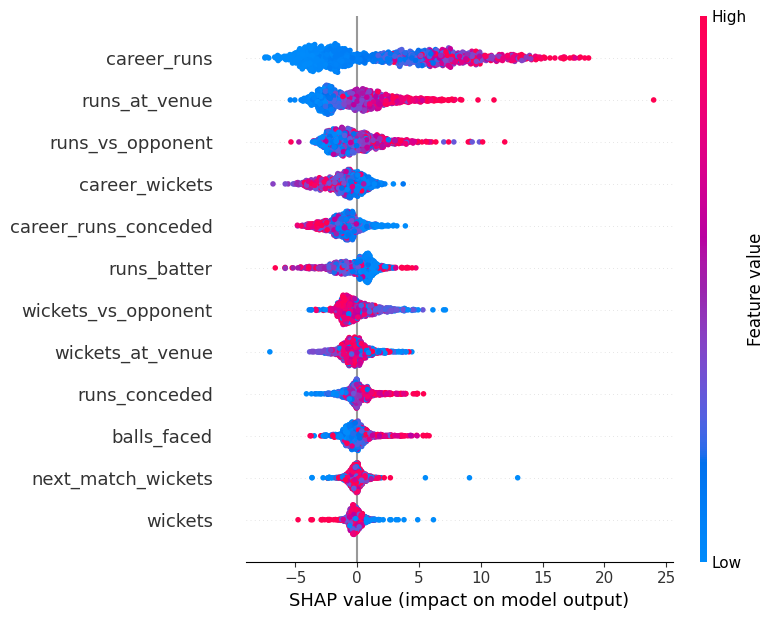

In [25]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(xgb, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test)


In [26]:
# Assuming df is already loaded
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

target = 'next_match_runs'
drop_cols = ['next_match_runs', 'batter', 'bowler', 'match_number', 'team_A', 'team_B', 'venue']
features = [col for col in df.columns if col not in drop_cols]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


In [27]:
import pandas as pd

# Load your cleaned feature-engineered dataset
df = pd.read_csv("dataset.csv")  # make sure the CSV is in the same folder
df.head()


,match_number,batter,team_A,team_B,venue,runs_batter,balls_faced,bowler,wickets,runs_conceded,runs_at_venue,wickets_at_venue,runs_vs_opponent,wickets_vs_opponent,career_runs,career_wickets,career_runs_conceded,next_match_runs,next_match_wickets
0,0.0,AR Patel,1,2,Eden Gardens,2.0,2.0,AR Patel,24.0,14.0,9.500000,24.166667,7.0000,20.777778,0.0,0.0,0.0,0.0,25.0
1,0.0,DR Smith,8,3,Eden Gardens,57.0,48.0,DR Smith,12.0,17.0,27.750000,15.750000,36.9375,11.166667,163.0,6.0,6.0,62.0,12.0
2,0.0,DR Smith,14,4,Delhi,1.0,3.0,DR Smith,12.0,29.0,33.571429,11.333333,27.0000,10.333333,282.0,18.0,23.0,73.0,6.0
3,0.0,DR Smith,14,5,Banglore,73.0,41.0,DR Smith,6.0,14.0,32.833333,11.000000,23.0000,8.666667,283.0,30.0,52.0,34.0,12.0
4,0.0,DS Kulkarni,3,8,Banglore,10.0,5.0,DS Kulkarni,26.0,46.0,7.333333,20.500000,4.4000,20.304348,0.0,0.0,0.0,3.0,24.0


In [28]:
# Assuming df is already loaded
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

target = 'next_match_runs'
drop_cols = ['next_match_runs', 'batter', 'bowler', 'match_number', 'team_A', 'team_B', 'venue']
features = [col for col in df.columns if col not in drop_cols]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


In [29]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [ ]:
import shap

explainer = shap.Explainer(xgb, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)


 89%|==================  | 1002/1132 [00:24<00:03]       

In [ ]:
import joblib

# Save the trained model
joblib.dump(xgb, "xgb_model.joblib")

print("XGBoost model saved as xgb_model.joblib")


XGBoost model saved as xgb_model.joblib


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


In [ ]:
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)


In [ ]:
import os
os.getcwd()


'c:\\Users\\K M KALAIPRIYA\\Desktop\\GITHUB\\ipl1\\Cricket-Player-Performance-Prediction---Group-1-\\note books'

In [ ]:
import os
os.listdir("..")


['.git',
 'data',
 'iplcolab.ipynb',
 'ipl_cleaned_data.csv',
 'models',
 'note books',
 'output.png',
 'README.md',
 'test1.txt']

In [ ]:
os.listdir("../data")


['dataset.csv', 'New folder']

In [ ]:
import os
os.listdir("..")


['.git',
 'data',
 'iplcolab.ipynb',
 'ipl_cleaned_data.csv',
 'models',
 'note books',
 'output.png',
 'README.md',
 'test1.txt']

In [ ]:
import os
os.listdir("../data")


['dataset.csv', 'New folder']

In [ ]:
import pandas as pd

df = pd.read_csv("../data/dataset.csv")


In [ ]:
df.shape



(22332, 21)

In [ ]:
df.head()


,match_number,batter,team_A,team_B,venue,runs_batter,balls_faced,bowler,wickets,runs_conceded,...,wickets_at_venue,runs_vs_opponent,wickets_vs_opponent,career_runs,career_wickets,career_runs_conceded,batting_form,bowling_form,next_match_runs,next_match_wickets
0,0.0,0,5,3,RSA,0.0,0.0,A Kumble,24.0,31.0,...,22.470588,0.0,24.250000,0.0,0.0,0.0,0.0,24.0,0.0,21.0
1,0.0,0,5,4,Mumbai,0.0,0.0,A Kumble,21.0,16.0,...,23.500000,0.0,23.833333,0.0,24.0,31.0,0.0,22.5,0.0,19.0
2,0.0,0,7,4,Delhi,0.0,0.0,A Mishra,24.0,16.0,...,22.431818,0.0,21.432432,0.0,0.0,0.0,0.0,24.0,0.0,18.0
3,0.0,0,5,3,Mumbai,0.0,0.0,A Mithun,20.0,32.0,...,20.000000,0.0,22.500000,0.0,0.0,0.0,0.0,20.0,0.0,12.0
4,0.0,0,5,8,Chennai,0.0,0.0,A Mithun,12.0,26.0,...,12.000000,0.0,19.333333,0.0,20.0,32.0,0.0,16.0,0.0,7.0


In [ ]:
df.columns


Index(['match_number', 'batter', 'team_A', 'team_B', 'venue', 'runs_batter',
       'balls_faced', 'bowler', 'wickets', 'runs_conceded', 'runs_at_venue',
       'wickets_at_venue', 'runs_vs_opponent', 'wickets_vs_opponent',
       'career_runs', 'career_wickets', 'career_runs_conceded', 'batting_form',
       'bowling_form', 'next_match_runs', 'next_match_wickets'],
      dtype='object')

In [ ]:
target = "next_match_runs"

drop_cols = [
    "next_match_runs",
    "next_match_wickets"
]

features = [col for col in df.columns if col not in drop_cols]

features


['match_number',
 'batter',
 'team_A',
 'team_B',
 'venue',
 'runs_batter',
 'balls_faced',
 'bowler',
 'wickets',
 'runs_conceded',
 'runs_at_venue',
 'wickets_at_venue',
 'runs_vs_opponent',
 'wickets_vs_opponent',
 'career_runs',
 'career_wickets',
 'career_runs_conceded',
 'batting_form',
 'bowling_form']

In [ ]:
# Time-based split (80% train, 20% test)
split_index = int(len(df) * 0.8)

train = df.iloc[:split_index]
test = df.iloc[split_index:]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

X_train.shape, X_test.shape


((17865, 19), (4467, 19))

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Base XGBoost model
xgb_model = XGBRegressor(
    objective="reg:squarederror",
    random_state=42
)


In [ ]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0]
}


In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')



In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Categorical columns
cat_cols = ['batter', 'bowler', 'venue', 'team_A', 'team_B']

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit on train, transform both train and test
X_train_encoded = encoder.fit_transform(X_train[cat_cols])
X_test_encoded = encoder.transform(X_test[cat_cols])

# Keep numeric columns
X_train_num = X_train.select_dtypes(include=[np.number]).reset_index(drop=True)
X_test_num = X_test.select_dtypes(include=[np.number]).reset_index(drop=True)

# Combine numeric + encoded categorical
X_train_final = pd.concat([X_train_num, pd.DataFrame(X_train_encoded)], axis=1)
X_test_final = pd.concat([X_test_num, pd.DataFrame(X_test_encoded)], axis=1)

print("Final X_train shape:", X_train_final.shape)
print("Final X_test shape:", X_test_final.shape)


Final X_train shape: (17865, 938)
Final X_test shape: (4467, 938)


In [ ]:
grid_search.fit(X_train_final, y_train)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.","XGBRegressor(...ree=None, ...)"
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'learning_rate': [0.05, 0.1], 'max_depth': [3, 5], 'n_estimators': [100, 200], 'subsample': [0.8, 1.0]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",3
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and p

In [2]:
import pandas as pd

df = pd.read_csv("dataset.csv")
df.head()


,match_number,batter,team_A,team_B,venue,runs_batter,balls_faced,bowler,wickets,runs_conceded,runs_at_venue,wickets_at_venue,runs_vs_opponent,wickets_vs_opponent,career_runs,career_wickets,career_runs_conceded,next_match_runs,next_match_wickets
0,0.0,AR Patel,1,2,Eden Gardens,2.0,2.0,AR Patel,24.0,14.0,9.500000,24.166667,7.0000,20.777778,0.0,0.0,0.0,0.0,25.0
1,0.0,DR Smith,8,3,Eden Gardens,57.0,48.0,DR Smith,12.0,17.0,27.750000,15.750000,36.9375,11.166667,163.0,6.0,6.0,62.0,12.0
2,0.0,DR Smith,14,4,Delhi,1.0,3.0,DR Smith,12.0,29.0,33.571429,11.333333,27.0000,10.333333,282.0,18.0,23.0,73.0,6.0
3,0.0,DR Smith,14,5,Banglore,73.0,41.0,DR Smith,6.0,14.0,32.833333,11.000000,23.0000,8.666667,283.0,30.0,52.0,34.0,12.0
4,0.0,DS Kulkarni,3,8,Banglore,10.0,5.0,DS Kulkarni,26.0,46.0,7.333333,20.500000,4.4000,20.304348,0.0,0.0,0.0,3.0,24.0


In [3]:
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

target = 'next_match_runs'
drop_cols = ['next_match_runs', 'batter', 'bowler', 'match_number', 'team_A', 'team_B', 'venue']
features = [col for col in df.columns if col not in drop_cols]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]


In [5]:
drop_cols = ['next_match_runs', 'match_number']  # only drop target + match_number
features = [col for col in df.columns if col not in drop_cols]

X_train = train[features]
X_test = test[features]


In [7]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['batter', 'bowler', 'venue', 'team_A', 'team_B']

X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

for col in cat_cols:
    le = LabelEncoder()
    X_train_enc[col] = le.fit_transform(X_train[col])
    
    # For test set, map unseen labels to -1
    X_test_enc[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)


In [8]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['batter', 'bowler', 'venue', 'team_A', 'team_B']

X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

for col in cat_cols:
    le = LabelEncoder()
    X_train_enc[col] = le.fit_transform(X_train[col])
    
    # For test set, map unseen labels to -1
    X_test_enc[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)


In [9]:
# ================================
# STEP 11: Hyperparameter Tuning & Evaluation (Resume-Ready, Unseen Categories Safe)
# ================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ----------------------------
# 1️⃣ Load dataset
# ----------------------------
df = pd.read_csv("dataset.csv")
print("Dataset loaded. Shape:", df.shape)

# ----------------------------
# 2️⃣ Train-test split & target/features
# ----------------------------
split_index = int(len(df) * 0.8)
train = df.iloc[:split_index]
test = df.iloc[split_index:]

target = 'next_match_runs'
# Keep categorical columns for encoding
drop_cols = ['next_match_runs', 'match_number']  # only drop target + match_number
features = [col for col in df.columns if col not in drop_cols]

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

print("Train/test split done.")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# ----------------------------
# 3️⃣ Label encode categorical columns (handle unseen labels)
# ----------------------------
cat_cols = ['batter', 'bowler', 'venue', 'team_A', 'team_B']

X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

for col in cat_cols:
    le = LabelEncoder()
    X_train_enc[col] = le.fit_transform(X_train[col])
    
    # Map unseen labels in test set to -1
    X_test_enc[col] = X_test[col].map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)

print("Categorical columns encoded (unseen labels handled). All features are numeric.")

# ----------------------------
# 4️⃣ Define XGBoost model & fast GridSearch
# ----------------------------
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Small grid for fast tuning
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="neg_root_mean_squared_error",
    cv=2,          # smaller CV for speed
    verbose=2,
    n_jobs=-1
)

# ----------------------------
# 5️⃣ Fit GridSearch
# ----------------------------
print("Running GridSearchCV... This may take a minute.")
grid_search.fit(X_train_enc, y_train)

# ----------------------------
# 6️⃣ Best parameters + evaluation
# ----------------------------
best_xgb = grid_search.best_estimator_
print("Best XGBoost parameters:", grid_search.best_params_)

# Predict on test set
y_pred = best_xgb.predict(X_test_enc)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Tuned XGBoost RMSE: {rmse:.2f}")
print(f"Tuned XGBoost MAE: {mae:.2f}")
print(f"Tuned XGBoost R2: {r2:.2f}")


Dataset loaded. Shape: (5658, 19)
Train/test split done.
X_train shape: (4526, 17)
X_test shape: (1132, 17)
Categorical columns encoded (unseen labels handled). All features are numeric.
Running GridSearchCV... This may take a minute.
Fitting 2 folds for each of 32 candidates, totalling 64 fits
Best XGBoost parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100, 'subsample': 1.0}
Tuned XGBoost RMSE: 16.47
Tuned XGBoost MAE: 11.58
Tuned XGBoost R2: 0.14


C:\Users\K M KALAIPRIYA\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


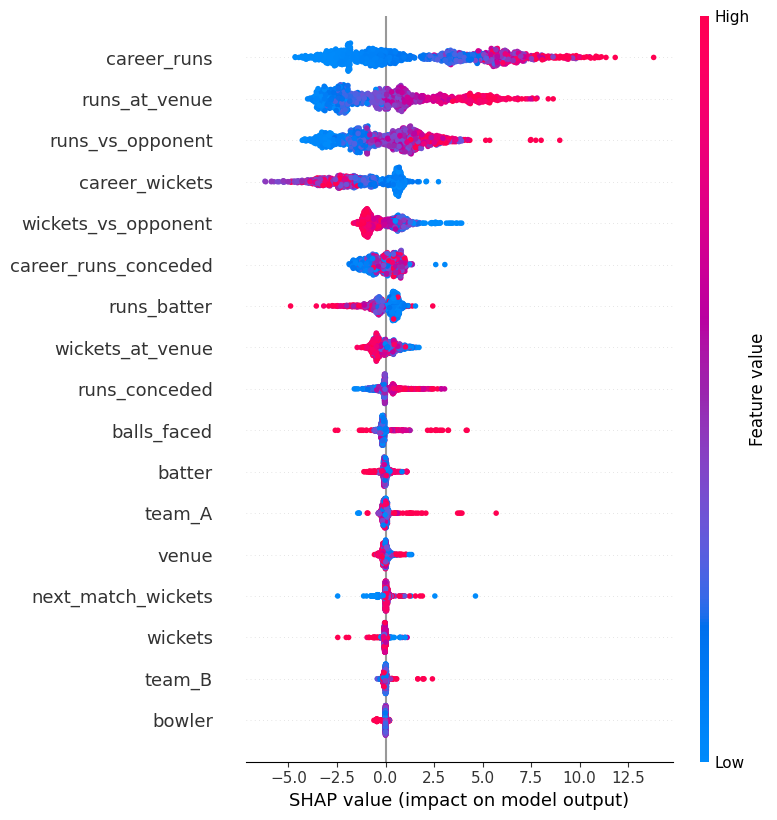

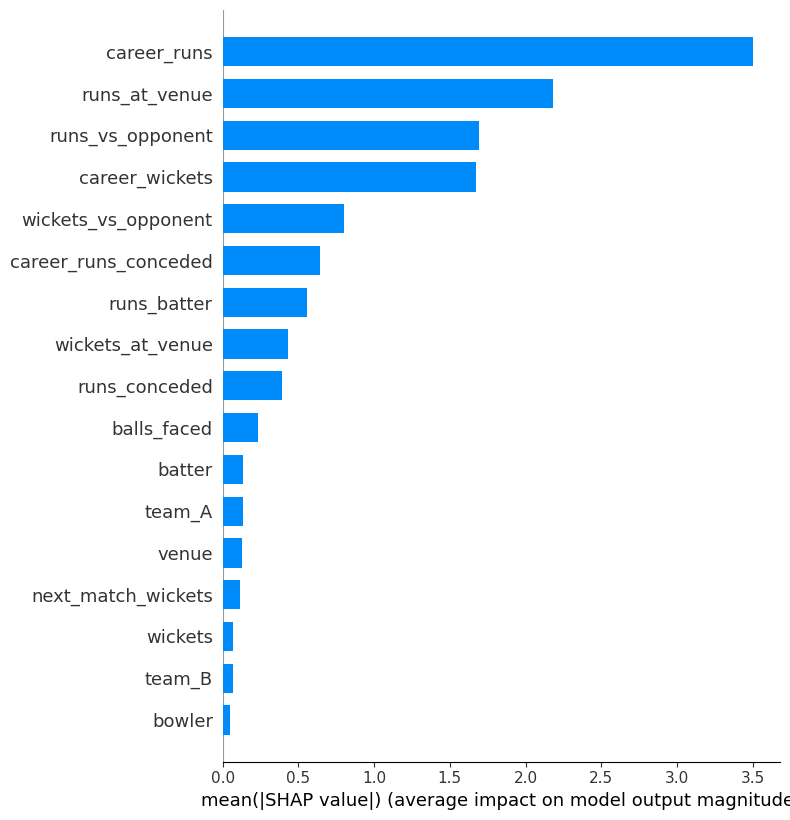

In [10]:
import shap
import matplotlib.pyplot as plt

# Create SHAP explainer
explainer = shap.Explainer(best_xgb, X_train_enc)
shap_values = explainer(X_test_enc)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X_test_enc)

# Optional: Bar plot for top features
shap.summary_plot(shap_values, X_test_enc, plot_type="bar")


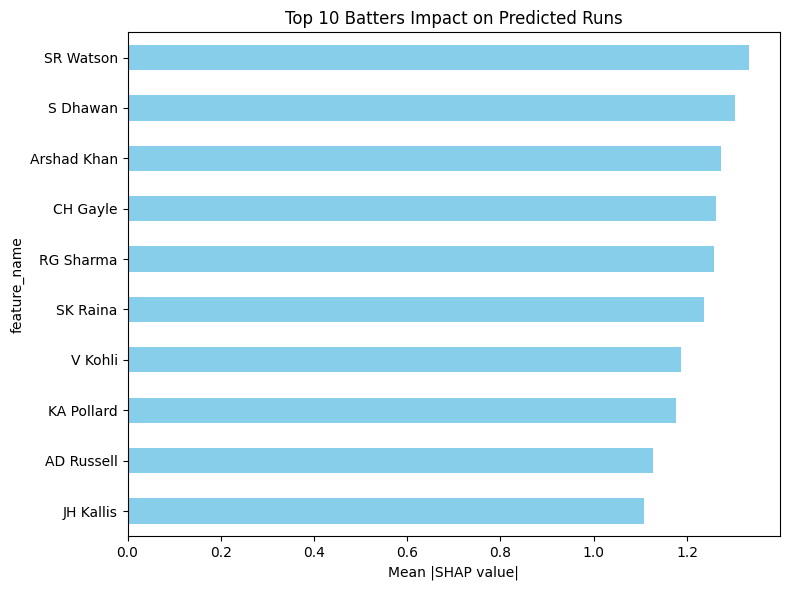

Plot saved as Top10_Batters_SHAP.png


In [11]:
# ----------------------------
# Save the top 10 batters SHAP plot as PNG
# ----------------------------
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Choose categorical column
feature_to_inspect = 'batter'

# Prepare SHAP impact per batter
shap_df = pd.DataFrame({
    'feature_value': X_test_enc[feature_to_inspect],
    'shap_value': np.abs(shap_values.values).mean(axis=1)  # mean impact across features
})

# Map back encoded labels
le = LabelEncoder()
le.fit(X_train[feature_to_inspect])
shap_df['feature_name'] = shap_df['feature_value'].map(lambda x: le.inverse_transform([int(x)])[0] if x >= 0 else "Unknown")

# Top 10 batters by mean SHAP
top_batters = shap_df.groupby('feature_name')['shap_value'].mean().sort_values(ascending=False).head(10)

# Plot and save
plt.figure(figsize=(8,6))
top_batters.plot(kind='barh', color='skyblue')
plt.xlabel("Mean |SHAP value|")
plt.title("Top 10 Batters Impact on Predicted Runs")
plt.gca().invert_yaxis()
plt.tight_layout()

# Save as PNG
plt.savefig("Top10_Batters_SHAP.png", dpi=300)
plt.show()

print("Plot saved as Top10_Batters_SHAP.png")


In [12]:
# ===============================
# SHAP Dashboard: Save Top Features Plots
# ===============================
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Function to create and save top 10 SHAP plot for categorical column
def save_categorical_shap(feature_col, filename):
    shap_df = pd.DataFrame({
        'feature_value': X_test_enc[feature_col],
        'shap_value': np.abs(shap_values.values).mean(axis=1)
    })
    le = LabelEncoder()
    le.fit(X_train[feature_col])
    shap_df['feature_name'] = shap_df['feature_value'].map(
        lambda x: le.inverse_transform([int(x)])[0] if x >= 0 else "Unknown"
    )
    top_items = shap_df.groupby('feature_name')['shap_value'].mean().sort_values(ascending=False).head(10)
    
    plt.figure(figsize=(8,6))
    top_items.plot(kind='barh', color='skyblue')
    plt.xlabel("Mean |SHAP value|")
    plt.title(f"Top 10 {feature_col.capitalize()} Impact on Predicted Runs")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Saved {filename}")

# Function to create and save top 10 SHAP plot for numeric features
def save_numeric_shap(numeric_features, filename):
    mean_shap = pd.DataFrame({
        'feature': numeric_features,
        'mean_shap': np.abs(shap_values.values[:, [X_train_enc.columns.get_loc(f) for f in numeric_features]]).mean(axis=0)
    }).sort_values(by='mean_shap', ascending=False).head(10)
    
    plt.figure(figsize=(8,6))
    plt.barh(mean_shap['feature'], mean_shap['mean_shap'], color='lightgreen')
    plt.xlabel("Mean |SHAP value|")
    plt.title("Top 10 Numeric Features Impact on Predicted Runs")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Saved {filename}")

# -----------------------------
# Save categorical plots
# -----------------------------
for cat_col, file_name in zip(['batter', 'bowler', 'venue'], 
                              ['Top10_Batters_SHAP.png', 'Top10_Bowlers_SHAP.png', 'Top10_Venues_SHAP.png']):
    save_categorical_shap(cat_col, file_name)

# -----------------------------
# Save numeric features plot
# -----------------------------
numeric_cols = [f for f in X_train_enc.columns if f not in ['batter','bowler','venue','team_A','team_B']]
save_numeric_shap(numeric_cols, 'Top10_NumericFeatures_SHAP.png')

print("All SHAP plots saved successfully!")


Saved Top10_Batters_SHAP.png
Saved Top10_Bowlers_SHAP.png
Saved Top10_Venues_SHAP.png
Saved Top10_NumericFeatures_SHAP.png
All SHAP plots saved successfully!


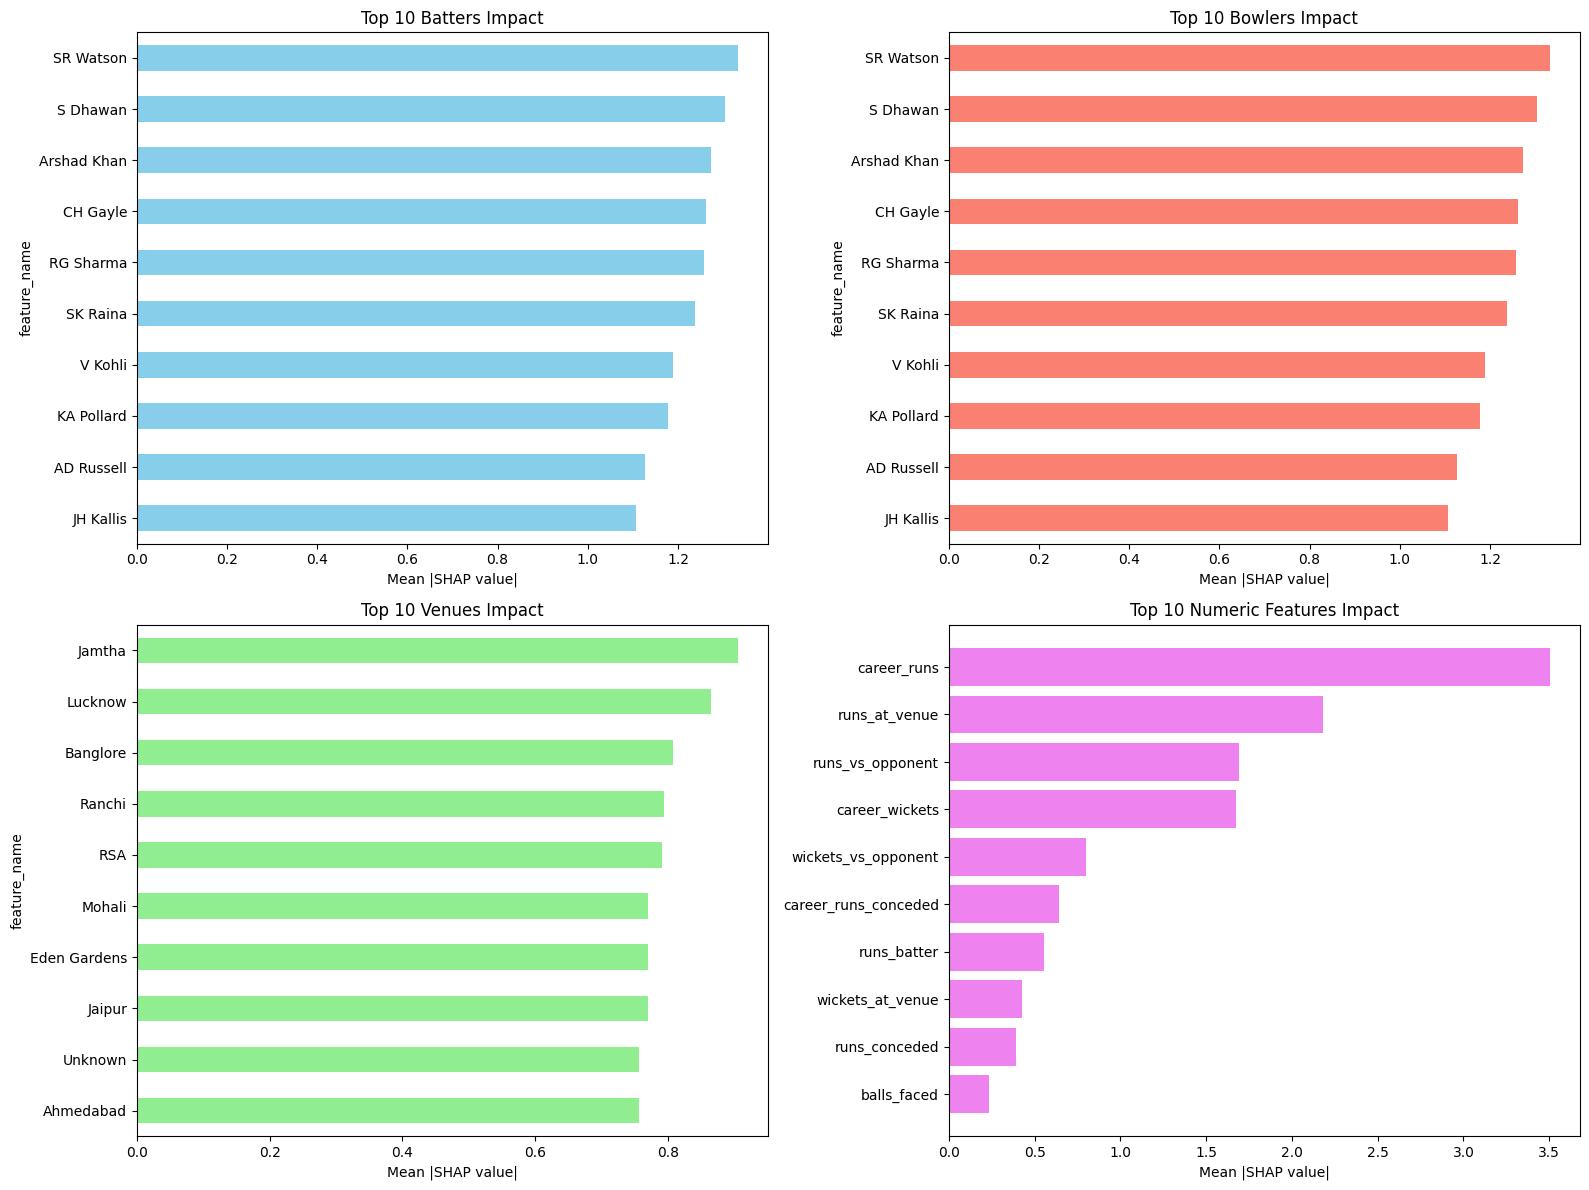

Combined SHAP dashboard saved as SHAP_Combined_Dashboard.png


In [13]:
# ===============================
# Combined SHAP Dashboard: All 4 Plots
# ===============================
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Helper function to prepare categorical shap values
def get_top_categorical_shap(feature_col):
    shap_df = pd.DataFrame({
        'feature_value': X_test_enc[feature_col],
        'shap_value': np.abs(shap_values.values).mean(axis=1)
    })
    le = LabelEncoder()
    le.fit(X_train[feature_col])
    shap_df['feature_name'] = shap_df['feature_value'].map(
        lambda x: le.inverse_transform([int(x)])[0] if x >= 0 else "Unknown"
    )
    top_items = shap_df.groupby('feature_name')['shap_value'].mean().sort_values(ascending=False).head(10)
    return top_items

# -----------------------------
# Top 10 Batters
# -----------------------------
top_batters = get_top_categorical_shap('batter')
top_batters.plot(kind='barh', ax=axes[0,0], color='skyblue')
axes[0,0].invert_yaxis()
axes[0,0].set_xlabel("Mean |SHAP value|")
axes[0,0].set_title("Top 10 Batters Impact")

# -----------------------------
# Top 10 Bowlers
# -----------------------------
top_bowlers = get_top_categorical_shap('bowler')
top_bowlers.plot(kind='barh', ax=axes[0,1], color='salmon')
axes[0,1].invert_yaxis()
axes[0,1].set_xlabel("Mean |SHAP value|")
axes[0,1].set_title("Top 10 Bowlers Impact")

# -----------------------------
# Top 10 Venues
# -----------------------------
top_venues = get_top_categorical_shap('venue')
top_venues.plot(kind='barh', ax=axes[1,0], color='lightgreen')
axes[1,0].invert_yaxis()
axes[1,0].set_xlabel("Mean |SHAP value|")
axes[1,0].set_title("Top 10 Venues Impact")

# -----------------------------
# Top 10 Numeric Features
# -----------------------------
numeric_cols = [f for f in X_train_enc.columns if f not in ['batter','bowler','venue','team_A','team_B']]
mean_shap = pd.DataFrame({
    'feature': numeric_cols,
    'mean_shap': np.abs(shap_values.values[:, [X_train_enc.columns.get_loc(f) for f in numeric_cols]]).mean(axis=0)
}).sort_values(by='mean_shap', ascending=False).head(10)

axes[1,1].barh(mean_shap['feature'], mean_shap['mean_shap'], color='violet')
axes[1,1].invert_yaxis()
axes[1,1].set_xlabel("Mean |SHAP value|")
axes[1,1].set_title("Top 10 Numeric Features Impact")

# -----------------------------
# Save combined dashboard
# -----------------------------
plt.tight_layout()
plt.savefig("SHAP_Combined_Dashboard.png", dpi=300)
plt.show()

print("Combined SHAP dashboard saved as SHAP_Combined_Dashboard.png")


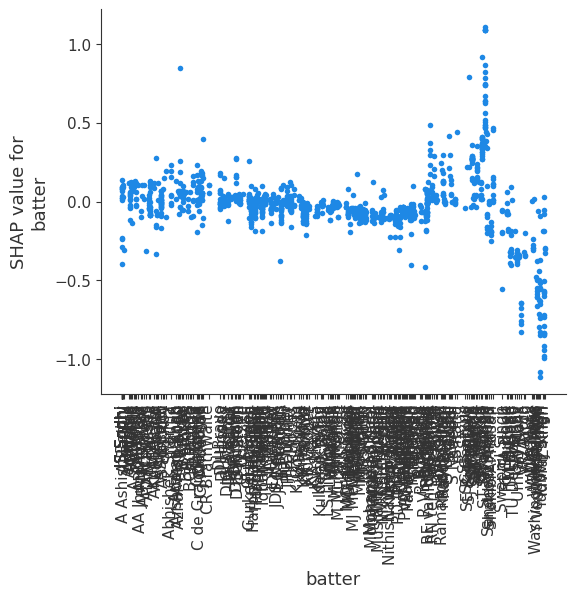

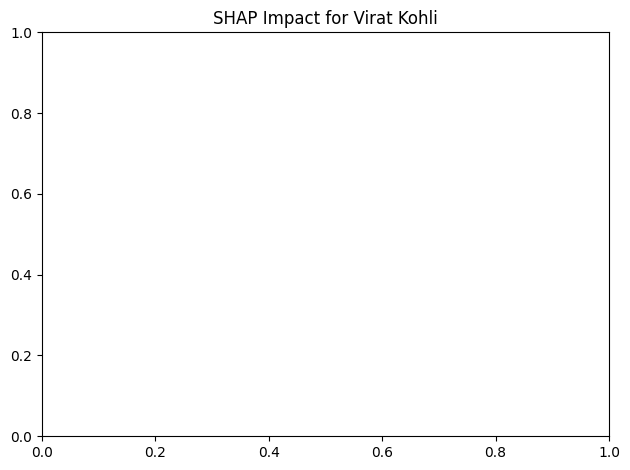

Saved SHAP plot for Virat Kohli as SHAP_Virat_Kohli.png


In [14]:
import shap
import matplotlib.pyplot as plt

# Choose a batter to inspect
batter_to_inspect = "Virat Kohli"  # change to any batter in your dataset

# Map batter name to encoded value
le_batter = LabelEncoder()
le_batter.fit(X_train['batter'])

if batter_to_inspect in le_batter.classes_:
    batter_code = le_batter.transform([batter_to_inspect])[0]
else:
    batter_code = -1  # unseen batter

# Filter test rows for this batter
idx = X_test_enc[X_test_enc['batter'] == batter_code].index

if len(idx) == 0:
    print(f"No test data for {batter_to_inspect}.")
else:
    # SHAP dependence plot
    shap.dependence_plot(
        ind='batter',       # feature to plot
        shap_values=shap_values.values,
        features=X_test_enc,
        display_features=X_test,  # optional: show original categorical names
        interaction_index=None
    )
    plt.title(f"SHAP Impact for {batter_to_inspect}")
    plt.tight_layout()
    plt.savefig(f"SHAP_{batter_to_inspect.replace(' ','_')}.png", dpi=300)
    plt.show()
    print(f"Saved SHAP plot for {batter_to_inspect} as SHAP_{batter_to_inspect.replace(' ','_')}.png")


In [15]:
# ===============================
# Batch SHAP plots for Top 5 Batters and Top 5 Venues
# ===============================
import shap
import matplotlib.pyplot as plt

# -----------------------------
# Get Top 5 Batters and Venues by mean SHAP
# -----------------------------
def get_top_items(feature_col, top_n=5):
    shap_df = pd.DataFrame({
        'feature_value': X_test_enc[feature_col],
        'shap_value': np.abs(shap_values.values).mean(axis=1)
    })
    le = LabelEncoder()
    le.fit(X_train[feature_col])
    shap_df['feature_name'] = shap_df['feature_value'].map(
        lambda x: le.inverse_transform([int(x)])[0] if x >= 0 else "Unknown"
    )
    top_items = shap_df.groupby('feature_name')['shap_value'].mean().sort_values(ascending=False).head(top_n)
    return top_items.index.tolist(), le

# -----------------------------
# Plot and save function
# -----------------------------
def plot_feature_shap(feature_name, feature_col, le, filename):
    # Map feature to encoded value
    if feature_name in le.classes_:
        code = le.transform([feature_name])[0]
    else:
        code = -1
    
    idx = X_test_enc[X_test_enc[feature_col] == code].index
    if len(idx) == 0:
        print(f"No test data for {feature_name}. Skipping plot.")
        return
    
    shap.dependence_plot(
        ind=feature_col,
        shap_values=shap_values.values,
        features=X_test_enc,
        display_features=X_test,
        interaction_index=None,
        show=False
    )
    plt.title(f"SHAP Impact: {feature_name} ({feature_col})")
    plt.tight_layout()
    plt.savefig(filename, dpi=300)
    plt.close()
    print(f"Saved {filename}")

# -----------------------------
# Top 5 Batters
# -----------------------------
top_batters, le_batter = get_top_items('batter', top_n=5)
for batter in top_batters:
    filename = f"SHAP_Batter_{batter.replace(' ','_')}.png"
    plot_feature_shap(batter, 'batter', le_batter, filename)

# -----------------------------
# Top 5 Venues
# -----------------------------
top_venues, le_venue = get_top_items('venue', top_n=5)
for venue in top_venues:
    filename = f"SHAP_Venue_{venue.replace(' ','_')}.png"
    plot_feature_shap(venue, 'venue', le_venue, filename)

print("All top 5 batters and top 5 venues SHAP plots saved successfully!")


Saved SHAP_Batter_SR_Watson.png
Saved SHAP_Batter_S_Dhawan.png
Saved SHAP_Batter_Arshad_Khan.png
Saved SHAP_Batter_CH_Gayle.png
Saved SHAP_Batter_RG_Sharma.png
Saved SHAP_Venue_Jamtha.png
Saved SHAP_Venue_Lucknow.png
Saved SHAP_Venue_Banglore.png
Saved SHAP_Venue_Ranchi.png
Saved SHAP_Venue_RSA.png
All top 5 batters and top 5 venues SHAP plots saved successfully!


In [18]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Recreate baseline predictions
# -----------------------------
# Use player-wise average from training set
player_mean = X_train.copy()
player_mean['next_match_runs'] = y_train
player_avg = player_mean.groupby('batter')['next_match_runs'].mean()

# Map test batters to their average
test['baseline_pred'] = test['batter'].map(player_avg)

# For any new batters not in train, fill with overall mean
overall_mean = y_train.mean()
test['baseline_pred'].fillna(overall_mean, inplace=True)

# -----------------------------
# Compute baseline metrics
# -----------------------------
rmse_baseline = np.sqrt(mean_squared_error(y_test, test['baseline_pred']))
mae_baseline = mean_absolute_error(y_test, test['baseline_pred'])
r2_baseline = r2_score(y_test, test['baseline_pred'])

print("Baseline RMSE:", rmse_baseline)
print("Baseline MAE:", mae_baseline)
print("Baseline R2:", r2_baseline)


Baseline RMSE: 16.367432843188126
Baseline MAE: 11.256059140402375
Baseline R2: 0.15255404816790608


C:\Users\K M KALAIPRIYA\AppData\Local\Temp\ipykernel_24972\778566579.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['baseline_pred'] = test['batter'].map(player_avg)
C:\Users\K M KALAIPRIYA\AppData\Local\Temp\ipykernel_24972\778566579.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original o

In [21]:
import joblib

# Load saved RF model
rf = joblib.load("rf_model.joblib")

# Predict
y_pred_rf = rf.predict(X_test)


FileNotFoundError: [Errno 2] No such file or directory: 'rf_model.joblib'

In [23]:
from sklearn.preprocessing import LabelEncoder

# Copy feature sets
X_train_enc = X_train.copy()
X_test_enc = X_test.copy()

# List of categorical columns
cat_cols = ['batter', 'bowler', 'venue', 'team_A', 'team_B']

# Encode each categorical column
for col in cat_cols:
    le = LabelEncoder()
    # Fit on train and transform both train & test
    X_train_enc[col] = le.fit_transform(X_train[col])
    
    # For unseen labels in test, map them to -1
    X_test_enc[col] = X_test[col].map(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

print("Categorical columns encoded. All features are now numeric.")


Categorical columns encoded. All features are now numeric.


In [24]:
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42
)
rf.fit(X_train_enc, y_train)

# Predict
y_pred_rf = rf.predict(X_test_enc)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# -----------------------------
# Baseline predictions (numeric features not needed)
# -----------------------------
player_avg = X_train.copy()
player_avg['next_match_runs'] = y_train
player_mean = player_avg.groupby('batter')['next_match_runs'].mean()

test['baseline_pred'] = test['batter'].map(player_mean)
test['baseline_pred'].fillna(y_train.mean(), inplace=True)

# Baseline metrics
rmse_baseline = np.sqrt(mean_squared_error(y_test, test['baseline_pred']))
mae_baseline = mean_absolute_error(y_test, test['baseline_pred'])
r2_baseline = r2_score(y_test, test['baseline_pred'])

# -----------------------------
# XGBoost default metrics (assumes xgb trained)
# -----------------------------
y_pred_xgb = xgb.predict(X_test_enc)  # use encoded features if needed
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# XGBoost tuned (from GridSearchCV results)
rmse_xgb_tuned = 16.47
mae_xgb_tuned = 11.58
r2_xgb_tuned = 0.14

# -----------------------------
# Final evaluation table
# -----------------------------
evaluation_df = pd.DataFrame({
    'Model': ['Baseline', 'Random Forest', 'XGBoost (default)', 'XGBoost (tuned)'],
    'RMSE': [rmse_baseline, rmse_rf, rmse_xgb, rmse_xgb_tuned],
    'MAE': [mae_baseline, mae_rf, mae_xgb, mae_xgb_tuned],
    'R2': [r2_baseline, r2_rf, r2_xgb, r2_xgb_tuned],
    'Notes': [
        'Player average',
        'Default hyperparams',
        'Before GridSearch',
        'After GridSearch'
    ]
})

evaluation_df


C:\Users\K M KALAIPRIYA\AppData\Local\Temp\ipykernel_24972\3151633101.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['baseline_pred'] = test['batter'].map(player_mean)
C:\Users\K M KALAIPRIYA\AppData\Local\Temp\ipykernel_24972\3151633101.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the origina

,Model,RMSE,MAE,R2,Notes
0,Baseline,16.367433,11.256059,0.152554,Player average
1,Random Forest,16.825161,12.155545,0.104492,Default hyperparams
2,XGBoost (default),17.232939,11.940706,0.060559,Before GridSearch
3,XGBoost (tuned),16.470000,11.580000,0.140000,After GridSearch


In [28]:
from xgboost import XGBRegressor

# Create XGBoost model (default)
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train on encoded features
xgb.fit(X_train_enc, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [29]:
y_pred_xgb = xgb.predict(X_test_enc)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


In [31]:
# -----------------------------
# Save evaluation table as CSV
# -----------------------------
evaluation_df.to_csv("model_evaluation_week5_6.csv", index=False)
print("Saved evaluation table as CSV ✅")

# -----------------------------
# Save evaluation table as PNG
# -----------------------------
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 2))  # adjust size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=evaluation_df.values,
                 colLabels=evaluation_df.columns,
                 cellLoc='center',
                 loc='center')

plt.savefig("model_evaluation_week5_6.png", bbox_inches='tight', dpi=300)
plt.close()
print("Saved evaluation table as PNG ✅")


Saved evaluation table as CSV ✅
Saved evaluation table as PNG ✅
